# Part 2 - Classification Algorithms


## Decision Tree Classifier
## Problem
Suppose you want to train a classifier using a decision tree. You can use scikit-learn’s DecisionTreeClassifier:

### Getting Dataset for classification tasks and some data visualization

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#load iris dataset for classification from scikit datasets library
iris = datasets.load_iris()


In [3]:
from IPython.display import Image
Image(url='https://www.tensorflow.org/images/iris_three_species.jpg')

From left to right, Iris setosa (by Radomil, CC BY-SA 3.0), Iris versicolor (by Dlanglois, CC BY-SA 3.0), and Iris virginica (by Frank Mayfield, CC BY-SA 2.0). (Image was taken from tensorflow website)

**input features**

In [4]:
features = iris.data
target = iris.target

**target data**

In [5]:
# Names of target in iris dataset
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In this classification problem the classes are 3 iris species:

0 = setosa

1 = versicolor

2 = virginica

In [6]:
# size of target
print(iris.target.shape)

(150,)


In [7]:
# print target data
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Converting dataset into Dataframe for getting some helpful insights about iris dataset. To perform this we need pandas numpy libraries.

In [8]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


Check columns names of dataset:

### Visualize Iris data with Python's visualization tools from Pandas, Matplotlib and Seaborn Libraries

In [11]:
df.Species.value_counts()

Species
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

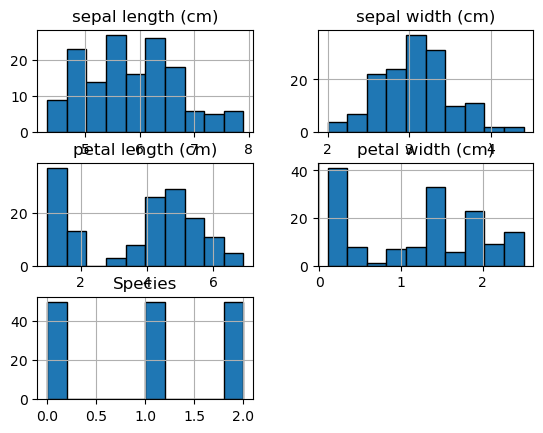

In [12]:
# plot iris features histogram
df.hist(edgecolor='black', linewidth=1)
plt.show()

### Visualize the correlations among feautres

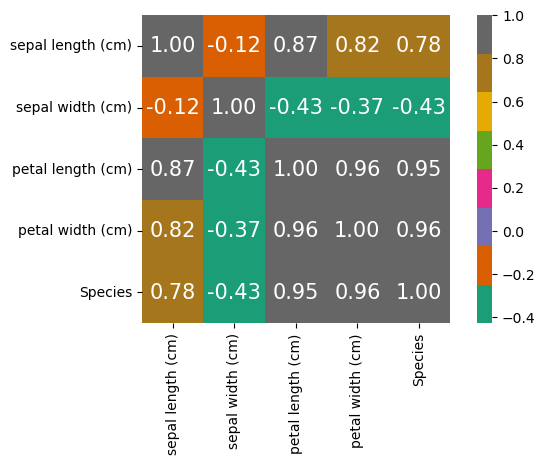

In [13]:
plt.figure(figsize=(7,4))
#draws  heatmap with input as the correlation matrix calculted by(df.corr())
sns.heatmap(df.corr(),cbar = True, square = True, annot=True, fmt='.2f',annot_kws={'size': 15},cmap='Dark2')
plt.show()

Based on the depicted figure, it is evident that Sepal Length and Sepal Width have weak correlations, while Petal Width and Petal Length exhibit strong correlations. This implies that the identification of species can be achieved more accurately using the Petal measurements compared to the Sepal measurements.

## Train a decision tree model

In [14]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [15]:
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

In [16]:
# Train model
model = decisiontree.fit(features, target)

In [17]:
# Cross-validate model using accuracy
cross_val_score(model, features, target, scoring='accuracy')

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [18]:
# Cross-validate model using macro averaged F1 score
cross_val_score(model, features, target, scoring='f1_macro')

array([0.96658312, 0.96658312, 0.89974937, 0.96658312, 1.        ])

**Discussion**

When we have balanced classes (e.g., a roughly equal number of observations in each class of the target vector), accuracy is—just like in the binary class setting—a simple and interpretable choice for an evaluation metric. Accuracy is the number of correct predictions divided by the number of observations and works just as well in the mul‐ ticlass as binary setting. However, when we have imbalanced classes (a common sce‐ nario), we should be inclined to use other evaluation metrics.

In scikit-learn, DecisionTreeClassifier operates like other learning methods; after the model is trained using fit we can use the model to predict the class of an observation:

In [19]:
# Make new observation
observation = [[ 5, 4, 3, 2]]

# Predict observation's class
model.predict(observation)

array([1])

We can also see the predicted class probabilities of the observation:

In [20]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)

array([[0., 1., 0.]])

## Visualizing a Classifier’s Performance

### Problem

Given predicted classes and true classes of the test data, you want to visually compare the model’s quality.

### Solution

Use a confusion matrix, which compares predicted classes and true classes:

In [27]:
 # Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

In [29]:
# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
        features, target, random_state=1)

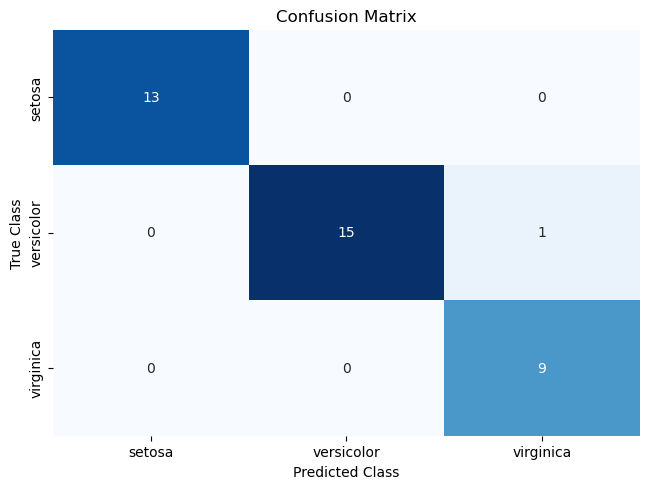

In [30]:
# Train model and make predictions
target_predicted = decisiontree.fit(features_train,
target_train).predict(features_test)

# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted) # Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Optional

Let's Visualize our Decision Tree Model

In [ ]:
# Load libraries
import pydotplus
from IPython.display import Image
from sklearn import tree

In [ ]:
# Create DOT data
dot_data = tree.export_graphviz(decisiontree,
                                    out_file=None,
                                    feature_names=iris.feature_names,
                                    class_names=iris.target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


**Discussion**

One of the key advantages of decision tree classifiers is their interpretability, as the entire trained model can be visualized. This makes decision trees one of the most comprehensible models in the field of machine learning. In our approach, we exported the trained model in DOT format, which is a graph description language, and utilized it to generate the graph visualization.

By examining the root node of the decision tree, we can observe the decision rule: if the petal width is less than or equal to 0.8, the left branch is followed; otherwise, the right branch is taken. Additionally, the graph displays the Gini impurity index (0.667), the total number of observations (150), the distribution of observations across each class ([50, 50, 50]), and the predicted class if the decision-making process ended at that node (setosa).

It is noteworthy that the learner found that a single decision rule (petal width (cm) <= 0.8) was sufficient to accurately identify all observations belonging to the setosa class at that node. Moreover, by incorporating one more decision rule with the same feature (petal width (cm) <= 1.75), the decision tree achieves correct classification of 144 out of 150 observations. This highlights the significant importance of the petal width feature in the decision-making process.